In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import cv2

plt.rc('image', cmap='gray') # set the default color-map of plt.image() to 'gray'
plt.rc('figure', figsize=[8,8]) # set a bigger default figure size

## playing the video as is

In [2]:
cap = cv2.VideoCapture('P4_juggling.mov')

while True:
    ret, frame = cap.read() # read next frame
    if ret==True:
        frame = cv2.resize(frame, (640, 360))
        cv2.imshow('Original Video', frame)
        
        if (cv2.waitKey(1) & 0xff == 27): # ESC key pressed?
            break
    else:
        break

cap.release() # release input video
cv2.destroyAllWindows() # delete output window
cv2.waitKey(1);

# Tracking
 
- First we looked for the lower and the upper thresholds of each color,

    and with the inRange function we created the mask, based on the first frame.
    

- To find the best values for the thresholds we used the HSV color range:

    <img src="hsv.png" width="350" align=left>

- We looked for the contours with the findContours function and the fit mask that we found for each ball.


- With the minEnclosingCircle function and the contour of the juggling balls we got the radius and the center (x,y).


- After we got the center and the radius of the ball we draw the bounding circle.


- In order to track the balls through all the video we used the same methods for each frame in the video and displayed the result.


    - Because of some changes of the colors and the brightness in the video we get different contours for few frames,
      So we increased the range and filtered only the fit contours according to the contourArea.

## Red 

In [3]:
def buildRedMask(frame):
    
#     Threshold the HSV image to get only red colors

    lowerRed = np.array([0,27,217])
    upperRed = np.array([7,206,255])
    
    frame = cv2.resize(frame,(640, 360)) 
    blur = cv2.GaussianBlur(frame,(0,0),3)
    hsv = cv2.cvtColor(blur, cv2.COLOR_BGR2HSV)
    maskRed = cv2.inRange(hsv, lowerRed, upperRed)
    
    return maskRed

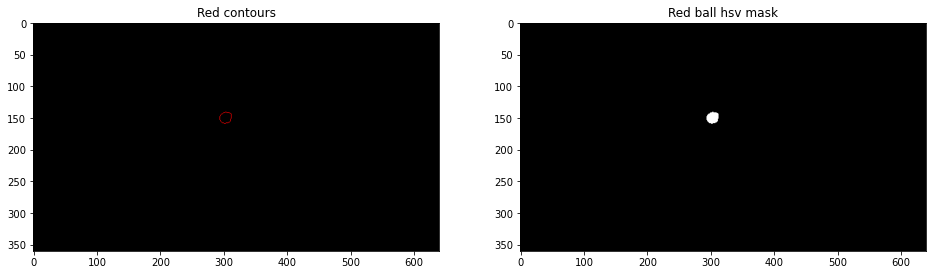

In [4]:
cap = cv2.VideoCapture('P4_juggling.mov')
# Take first frame and find corners in it
ret, frame = cap.read()

maskRed = buildRedMask(frame)

blank = np.zeros(frame.shape,dtype='uint8')
contours, _ = cv2.findContours(maskRed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)  
cv2.drawContours(blank,contours,-1,(255,0,0),1)

plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.imshow(blank)
plt.title('Red contours')

plt.subplot(1,2,2)
plt.imshow(maskRed)
plt.title('Red ball hsv mask')

plt.show()

### Red ball overlay

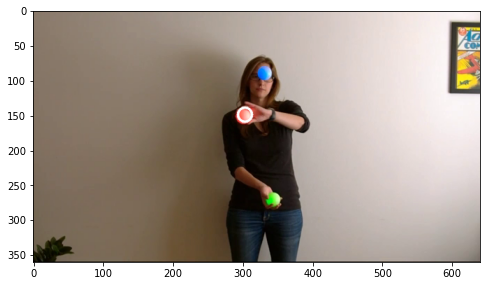

In [5]:
redBall = contours[0]
(x,y),radiusRed = cv2.minEnclosingCircle(redBall)
center = (int(x),int(y))
radiusRed = int(radiusRed)
cv2.circle(frame,center,radiusRed,(255,255,255),2, lineType=cv2.LINE_AA)

frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

plt.imshow(frame)

### Tracking the red ball

In [6]:
cap = cv2.VideoCapture('P4_juggling.mov')
ret ,frame = cap.read()
redMask = buildRedMask(frame)

contours, _ = cv2.findContours(redMask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)  
print(len(contours))

sizes = []
for i in range(len(contours)):
    M = cv2.moments(contours[i])
    sizes.append(M['m00'])

print(np.unique(sizes).astype(np.int64))

ballContours = []
for i in range(len(contours)):
    M = cv2.moments(contours[i])
    if 0<(M['m00'])>70:
        ballContours.append(contours[i])
        
print(len(ballContours))

1
[253]
1


In [7]:
def redDraw(redMask):

    contours, _ = cv2.findContours(redMask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)  
    ballContours = []    
    for i in range(len(contours)):
        M = cv2.moments(contours[i])
        if (M['m00'])>70: # contourArea
            ballContours.append(contours[i])
            blueBall = ballContours[0]
            (x,y),_ = cv2.minEnclosingCircle(blueBall)
            center = (int(x),int(y))    
            cv2.circle(frame,center,radiusRed,(255,255,255),2, lineType=cv2.LINE_AA)
            
    return (x,y)

In [8]:
cap = cv2.VideoCapture('P4_juggling.mov')

while(True):
    ret ,frame = cap.read()
    if ret == True:
        
        redMask = buildRedMask(frame)
        (x,y) = redDraw(redMask)
        cv2.imshow('Red-Track',frame) # display frame in a window

        k = cv2.waitKey(1) & 0xff
        if k == 27:
            break
    else:
        break

cap.release() # release input video
cv2.destroyAllWindows() # delete output window
cv2.waitKey(1)

-1

## Blue

In [9]:
def buildBlueMask(frame):
    
#     Threshold the HSV image to get only blue colors
    
    lowerBlue = np.array([70,65,205])
    upperBlue = np.array([140,255,255])

    frame = cv2.resize(frame,(640, 360)) 
    blur = cv2.GaussianBlur(frame,(0,0),1)
    hsv = cv2.cvtColor(blur, cv2.COLOR_BGR2HSV)
    maskBlue = cv2.inRange(hsv, lowerBlue, upperBlue)
    
    return maskBlue

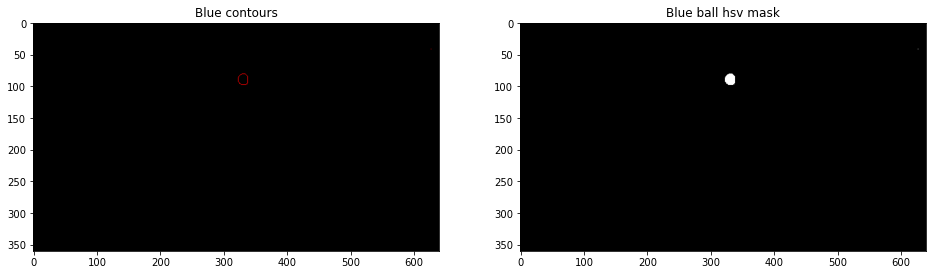

In [10]:
cap = cv2.VideoCapture('P4_juggling.mov')
# Take first frame and find corners in it
ret, frame = cap.read()

maskBlue = buildBlueMask(frame)

blank = np.zeros(frame.shape,dtype='uint8')
contours, _ = cv2.findContours(maskBlue, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)  
cv2.drawContours(blank,contours,-1,(255,0,0),1)

plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.imshow(blank)
plt.title('Blue contours')

plt.subplot(1,2,2)
plt.imshow(maskBlue)
plt.title('Blue ball hsv mask')

plt.show()

### Blue ball overlay

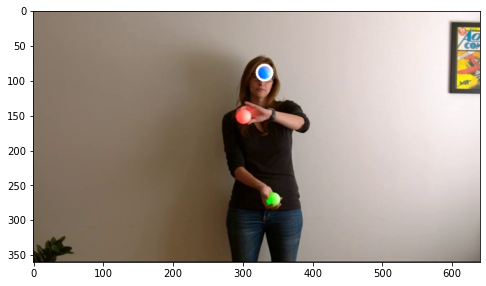

In [11]:
blueBall = contours[0]
(x,y),radiusBlue = cv2.minEnclosingCircle(blueBall)
center = (int(x),int(y))
radiusBlue = int(radiusBlue+2)
cv2.circle(frame,center,radiusBlue,(255,255,255),2,lineType=cv2.LINE_AA)

frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
plt.imshow(frame)

### Tracking the blue ball

In [12]:
cap = cv2.VideoCapture('P4_juggling.mov')
ret ,frame = cap.read()

blueMask = buildBlueMask(frame)
contours, _ = cv2.findContours(blueMask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)  
print(len(contours))

sizes = []
for i in range(len(contours)):
    M = cv2.moments(contours[i])
    sizes.append(M['m00'])

print(np.unique(sizes).astype(np.int64))

ballContours = []
for i in range(len(contours)):
    M = cv2.moments(contours[i])
    if 0<(M['m00'])>120:
        ballContours.append(contours[i])
        
print(len(ballContours))

2
[  0 216]
1


In [13]:
def buildBlueMaskForTracking(frame):
    
    lowerBlue = np.array([90,50,95])
    upperBlue = np.array([180,255,255])

    frame = cv2.resize(frame, (640, 360)) 
    blur = cv2.GaussianBlur(frame ,(0,0),3)
    hsv = cv2.cvtColor(blur, cv2.COLOR_BGR2HSV)
    mask = cv2.inRange(hsv, lowerBlue, upperBlue)
    
    return mask

In [14]:
def blueDraw(blueMask):   
          
    contours, _ = cv2.findContours(blueMask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)  
    ballContours = []
    for i in range(len(contours)):
        M = cv2.moments(contours[i])
        if (M['m00'])>120: # contourArea
            ballContours.append(contours[i])
            blueBall = ballContours[0]
            (x,y),_ = cv2.minEnclosingCircle(blueBall)
            center = (int(x),int(y))    
            cv2.circle(frame,center,radiusBlue,(255,255,255),2,lineType=cv2.LINE_AA)
            
    return (x,y)            

In [15]:
cap = cv2.VideoCapture('P4_juggling.mov')

while(True):
    ret ,frame = cap.read()
    if ret == True:
        
        blueMask = buildBlueMaskForTracking(frame)
        (x,y) = blueDraw(blueMask)
        cv2.imshow('Blue-Track',frame) # display frame in a window

        k = cv2.waitKey(1) & 0xff
        if k == 27:
            break
    else:
        break

cap.release() # release input video
cv2.destroyAllWindows() # delete output window
cv2.waitKey(1)

-1

## green

In [16]:
def buildGreenMask(frame): 
    
#     Threshold the HSV image to get only green colors
    
    lowerGreen = np.array([42,30,35])
    upperGreen = np.array([70,255,255])
    
    frame = cv2.resize(frame, (640, 360)) 
    blur = cv2.GaussianBlur(frame,(0,0),1)
    hsv = cv2.cvtColor(blur, cv2.COLOR_BGR2HSV)
    maskGreen = cv2.inRange(hsv, lowerGreen, upperGreen)
    
    return maskGreen

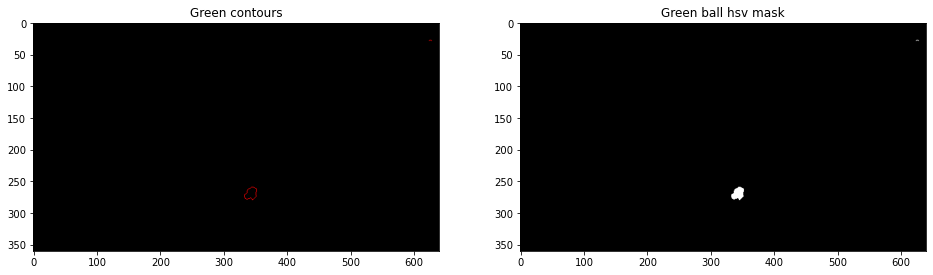

In [17]:
cap = cv2.VideoCapture('P4_juggling.mov')
# Take first frame and find corners in it
ret, frame = cap.read()

maskGreen = buildGreenMask(frame) 

blank = np.zeros(frame.shape,dtype='uint8')
contours, _ = cv2.findContours(maskGreen, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)  
cv2.drawContours(blank,contours,-1,(255,0,0),1)

plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.imshow(blank)
plt.title('Green contours')

plt.subplot(1,2,2)
plt.imshow(maskGreen)
plt.title('Green ball hsv mask')

plt.show()

### Green ball overlay

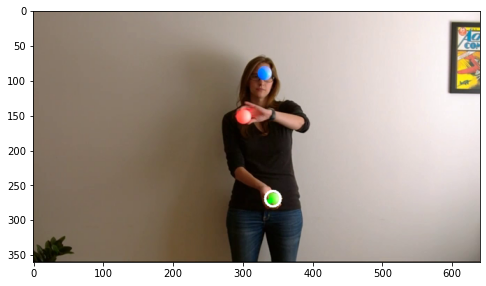

In [18]:
greenBall = contours[0]
(x,y),radiusGreen = cv2.minEnclosingCircle(greenBall)
center = (int(x),int(y))
radiusGreen = int(radiusGreen)
cv2.circle(frame,center,radiusGreen,(255,255,255),2,lineType=cv2.LINE_AA)

frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
plt.imshow(frame)

### Tracking the green ball

In [19]:
cap = cv2.VideoCapture('P4_juggling.mov')
ret ,frame = cap.read()

maskGreen = buildGreenMask(frame)
contours, _ = cv2.findContours(maskGreen, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)  
print(len(contours))

sizes = []
for i in range(len(contours)):
    M = cv2.moments(contours[i])
    sizes.append(M['m00'])

print(np.unique(sizes).astype(np.int64))

ballContours = []
for i in range(len(contours)):
    M = cv2.moments(contours[i])
    if 0<(M['m00'])>100:
        ballContours.append(contours[i])
        
print(len(ballContours))

2
[  0 263]
1


In [20]:
def greenDraw(greenMask):
    
    contours, _ = cv2.findContours(greenMask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)  
    ballContours = []
    for i in range(len(contours)):
        M = cv2.moments(contours[i])
        if (M['m00'])>100: # contourArea
            ballContours.append(contours[i])
            greenBall = ballContours[0]
            (x,y),_ = cv2.minEnclosingCircle(greenBall)
            center = (int(x),int(y))    
            cv2.circle(frame,center,radiusGreen,(255,255,255),2,lineType=cv2.LINE_AA)
            
    return (x,y)

In [21]:
cap = cv2.VideoCapture('P4_juggling.mov')

while(True):
    ret ,frame = cap.read()
    if ret == True:
        
        greenMask = buildGreenMask(frame)
        (x,y) = greenDraw(greenMask)
        cv2.imshow('Green-Track',frame) # display frame in a window   
        

        k = cv2.waitKey(1) & 0xff
        if k == 27:
            break
    else:
        break

cap.release() # release input video
cv2.destroyAllWindows() # delete output window
cv2.waitKey(1)

-1

# Red & Blue & Green

In [22]:
def build_mask(frame):
    
    redMask = buildRedMask(frame)
    blueMask = buildBlueMaskForTracking(frame)
    greenMask = buildGreenMask(frame)
    
    return redMask, blueMask, greenMask

In [23]:
def draw_overlay(redMask, blueMask, greenMask):
    
    (x_red,y_red) = redDraw(redMask)            
    (x_blue,y_blue) = blueDraw(blueMask)
    (x_green,y_green) = greenDraw(greenMask)
    
    return (x_red,y_red), (x_blue,y_blue), (x_green,y_green)

## Overlay trajectories

- In order to draw overlay trajectories, We track each ball and draw a line from old point to new point on each frame.

In [24]:
cap = cv2.VideoCapture('P4_juggling.mov')

# # output video settings (metadata of the file)
# W = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
# H = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
# FPS = cap.get(cv2.CAP_PROP_FPS)
# fourcc = cv2.VideoWriter_fourcc(*'mp4v')
# out = cv2.VideoWriter('juggling_Overlay-trajectories.mp4', fourcc, FPS, (W, H))

# Take first frame and find corners in it
ret, frame = cap.read()
if ret == True: 
    redMask, blueMask, greenMask = build_mask(frame)
    (x_red,y_red), (x_blue,y_blue), (x_green,y_green) = draw_overlay(redMask, blueMask, greenMask)
    
line_red = (0,0,255)
line_blue = (255,0,0)
line_green = (0,255,0)
        
canvas = np.zeros_like(frame)
canvas = np.uint8(canvas*0.95) # fade out canvas  

while(True):
    ret ,frame = cap.read()
    if ret == True: 
        redMask, blueMask, greenMask = build_mask(frame)

        (old_X_red,old_Y_red) = (x_red,y_red)
        (old_X_blue,old_Y_blue) = (x_blue,y_blue)
        (old_X_green,old_Y_green) = (x_green,y_green)
        
        (x_red,y_red), (x_blue,y_blue), (x_green,y_green) = draw_overlay(redMask, blueMask, greenMask)
        
        red = cv2.line(canvas,(int(old_X_red),int(old_Y_red)),(int(x_red),int(y_red)),line_red,3)
        blue = cv2.line(canvas,(int(old_X_blue),int(old_Y_blue)),(int(x_blue),int(y_blue)),line_blue,3)
        green = cv2.line(canvas,(int(old_X_green),int(old_Y_green)),(int(x_green),int(y_green)),line_green,3)

        frame = cv2.add(red, frame)
        frame = cv2.add(blue, frame)
        frame = cv2.add(green, frame)
        
        cv2.imshow('overlay trajectories',frame)
        cv2.imshow('canvas', canvas)
        
#         out.write(frame)  # write frame to output file (must be in BGR !!)
        
        k = cv2.waitKey(1) & 0xff
        if k == 27:
            break
    else:
        break

cap.release() # release input video
# out.release()  # release output video
cv2.destroyAllWindows() # delete output window
cv2.waitKey(1)

-1

## Velocity

- To get the velocity we calculate the distance from the old point to the new point in each frame and divide in fps(frames per second) as the time unit.


- We created the putVelocity method to display nicely the velocity on the video for each frame.


- During the process we insert the velocities to arrays that we created for each ball at the beginning for later display the velocities as a function of time.

In [25]:
def calcDist(x1, y1, x2, y2):
    xHold = x1 - x2
    yHold = y1 - y2
    xSquare = xHold ** 2
    ySquare = yHold ** 2
    return (xSquare + ySquare) ** 0.5

In [26]:
def putVelocity(img, text, org):
    rect_color = (240,240,240)
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_color = (10,10,10)
    font_size = 0.5
    thickness = cv2.FILLED
    margin = 3

    text_size = cv2.getTextSize(text, font, font_size, thickness)
    end_x = org[0] + text_size[0][0] + margin
    end_y = org[1] - text_size[0][1] - margin

    cv2.rectangle(img, org, (end_x, end_y), rect_color, thickness)
    cv2.putText(img, text, org, font, font_size, font_color, 1, cv2.LINE_AA)

In [27]:
cap = cv2.VideoCapture('P4_juggling.mov')

# # output video settings (metadata of the file)
# W = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
# H = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
# FPS = cap.get(cv2.CAP_PROP_FPS)
# fourcc = cv2.VideoWriter_fourcc(*'mp4v')
# out = cv2.VideoWriter('juggling_Velocities.mp4', fourcc, FPS, (W, H))

fps = (cap.get(cv2.CAP_PROP_FPS) / 100)

velocity_red_arr = []
velocity_blue_arr = []
velocity_green_arr = []

# Take first frame and find corners in it
ret, frame = cap.read()
if ret == True: 
    redMask, blueMask, greenMask = build_mask(frame)
    (x_red,y_red), (x_blue,y_blue), (x_green,y_green) = draw_overlay(redMask, blueMask, greenMask)

while(True):
    ret ,frame = cap.read()
    if ret == True: 
        redMask, blueMask, greenMask = build_mask(frame)

        (old_X_red,old_Y_red) = (x_red,y_red)
        (old_X_blue,old_Y_blue) = (x_blue,y_blue)
        (old_X_green,old_Y_green) = (x_green,y_green)
        
        (x_red,y_red), (x_blue,y_blue), (x_green,y_green) = draw_overlay(redMask, blueMask, greenMask)
        
        VelocityRed = '%.2f' % (calcDist(old_X_red,old_Y_red,x_red,y_red) / fps)
        VelocityBlue = '%.2f' % (calcDist(old_X_blue,old_Y_blue,x_blue,y_blue) / fps)
        VelocityGreen = '%.2f' % (calcDist(old_X_green,old_Y_green,x_green,y_green) / fps)

        velocity_red_arr.append(VelocityRed)
        velocity_blue_arr.append(VelocityBlue)
        velocity_green_arr.append(VelocityGreen)
        
        putVelocity(frame, VelocityRed,(int(x_red+15),int(y_red+5)))
        putVelocity(frame, VelocityBlue,(int(x_blue+15),int(y_blue+5)))
        putVelocity(frame, VelocityGreen,(int(x_green+15),int(y_green+5)))

        cv2.imshow('Track-all',frame) # display frame in a window
#         out.write(frame)  # write frame to output file (must be in BGR !!)

        k = cv2.waitKey(1) & 0xff
        if k == 27:
            break
    else:
        break

cap.release() # release input video
# out.release()  # release output video
cv2.destroyAllWindows() # delete output window
cv2.waitKey(1)

-1

### Velocity of each ball, as a function of time

- Convert each array from str to float in order to plot the velocity in a graph.

##### Velocity of red ball

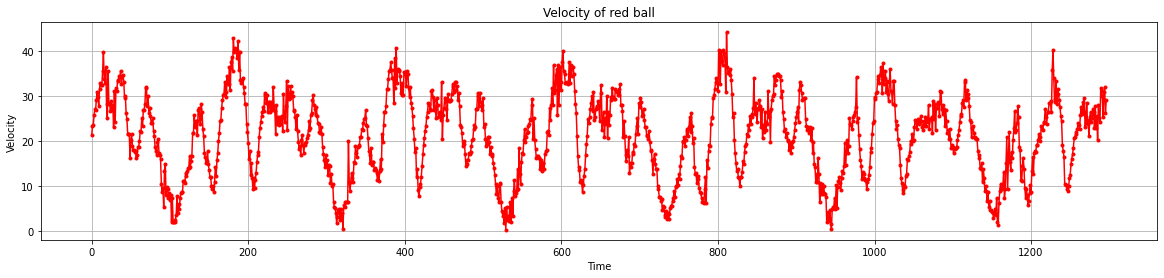

In [28]:
v_red = []
for i in velocity_red_arr:
    v_red.append(float(i))

plt.figure(figsize=(20,4))
plt.plot(v_red,'.-', color="r");
plt.title("Velocity of red ball")
plt.ylabel("Velocity")
plt.xlabel("Time")
plt.grid()
plt.show()

##### Velocity of blue ball

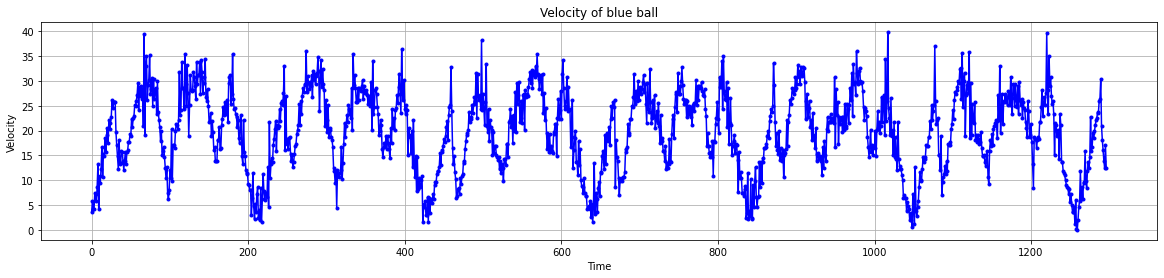

In [29]:
v_blue = []
for i in velocity_blue_arr:
    v_blue.append(float(i))

plt.figure(figsize=(20,4))
plt.plot(v_blue,'.-', color="b");
plt.title("Velocity of blue ball")
plt.ylabel("Velocity")
plt.xlabel("Time")
plt.grid()
plt.show()

##### Velocity of green ball

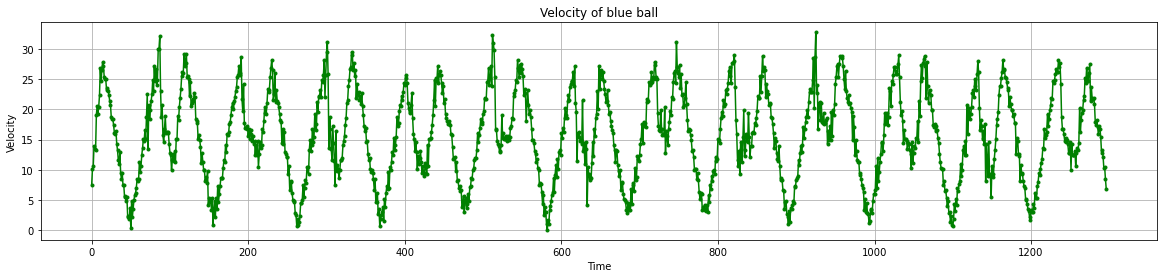

In [30]:
v_green = []
for i in velocity_green_arr:
    v_green.append(float(i))

plt.figure(figsize=(20,4))
plt.plot(v_green,'.-', color="g");
plt.title("Velocity of blue ball")
plt.ylabel("Velocity")
plt.xlabel("Time")
plt.grid()
plt.show()

##### Velocity of each ball

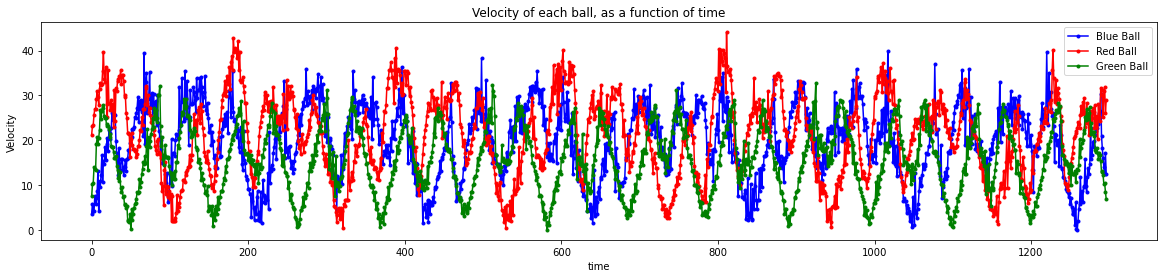

In [31]:
plt.figure(figsize=(20,4))

plt.plot(v_blue,'.-',label = "Blue Ball", color="b");
plt.plot(v_red,'.-',label = "Red Ball", color="r");
plt.plot(v_green,'.-',label = "Green Ball", color="g");
  
plt.ylabel('Velocity') 
plt.xlabel('time') 
plt.title('Velocity of each ball, as a function of time') 
plt.legend() 
plt.show() 

# Data analysis

In [32]:
def getFastestBall(redBallVelocities, blueBallVelocities, greenBallVelocities):
    
    maxVelocity = 0
    fasterBall = ''
    if max(redBallVelocities) > maxVelocity:
        maxVelocity = max(redBallVelocities)
        fasterBall = 'red'
    elif max(blueBallVelocities) > maxVelocity:
        maxVelocity = max(blueBallVelocities)
        fasterBall = 'blue'
    elif max(greenBallVelocities) > maxVelocity:
        maxVelocity = max(greenBallVelocities)
        fasterBall = 'green'
        
    return maxVelocity, fasterBall

In [33]:
def getAvgVelocity(redBallVelocities, blueBallVelocities, greenBallVelocities):
    velocity = 0
    count = len(redBallVelocities) + len(blueBallVelocities) + len(greenBallVelocities)
    
    for vr in redBallVelocities:
        velocity += vr
    for vb in blueBallVelocities:
        velocity += vb
    for vg in greenBallVelocities:
        velocity += vg
    
    avg = velocity / count
    
    return avg    

In [34]:
maxVelocity, fastestBall = getFastestBall(v_red, v_blue, v_green)
avg = getAvgVelocity(v_red, v_blue, v_green)

print('The velocity gets up to ' + str(maxVelocity) + ' and the fastest ball is the ' + fastestBall + ' ball.')

print('The avarge velocity of all balls is ' + '%.2f' %(avg) + '.')

The velocity gets up to 44.08 and the fastest ball is the red ball.
The avarge velocity of all balls is 18.97.


## End is here